In [1]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
appClean = pd.read_csv("updated_appData.csv")  # Reading the updated dataset in the csv

In [3]:
#Dropping Columns not necessary for analysis
appClean.drop(columns=['Last Updated Formatted', 'KB', 'Rating', 'Minimum Age Requirement', 'Reviews', 'Paid or Free', 'Price', 'App'], inplace=True)

In [4]:
appClean.head()

,Category,Installs
0,ART_AND_DESIGN,10000.0
1,ART_AND_DESIGN,500000.0
2,ART_AND_DESIGN,5000000.0
3,ART_AND_DESIGN,50000000.0
4,ART_AND_DESIGN,100000.0


In [5]:
#Define the bin edges and labels for each range
bins = [0, 1000, 10000, 100000, 500000, float('inf')]  # float('inf') for 500,000+
labels = ['0-1000', '1001-10000', '10001-100000', '100001-500000', '500000+']

#Create a new column categorizing the 'Installs' into these bins
appClean['Install Group'] = pd.cut(appClean['Installs'], bins=bins, labels=labels, right=True)

#Display the DataFrame to see the new column
print(appClean)

                  Category    Installs  Install Group
0           ART_AND_DESIGN     10000.0     1001-10000
1           ART_AND_DESIGN    500000.0  100001-500000
2           ART_AND_DESIGN   5000000.0        500000+
3           ART_AND_DESIGN  50000000.0        500000+
4           ART_AND_DESIGN    100000.0   10001-100000
...                    ...         ...            ...
10836               FAMILY      5000.0     1001-10000
10837               FAMILY       100.0         0-1000
10838              MEDICAL      1000.0         0-1000
10839  BOOKS_AND_REFERENCE      1000.0         0-1000
10840            LIFESTYLE  10000000.0        500000+

[10841 rows x 3 columns]


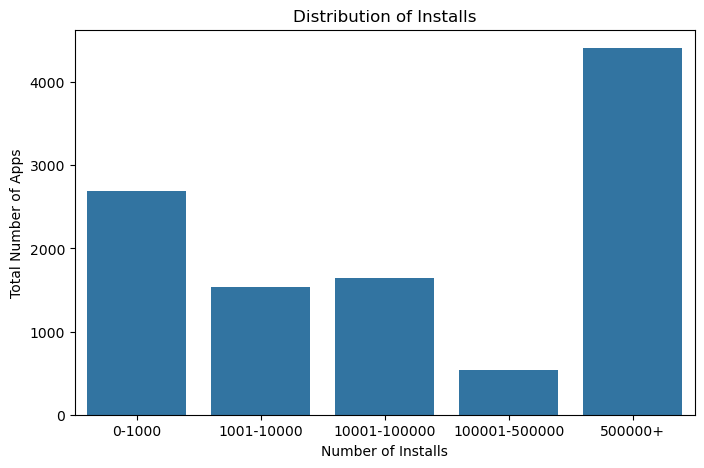

In [6]:
# Count the total number of apps in each bin
counts = appClean['Install Group'].value_counts()

# Create a bar chart for comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=counts.index, y=counts.values)  # Removed palette parameter

# Set titles and labels
plt.title('Distribution of Installs')
plt.xlabel('Number of Installs')
plt.ylabel('Total Number of Apps')

# Show the plot
plt.show()

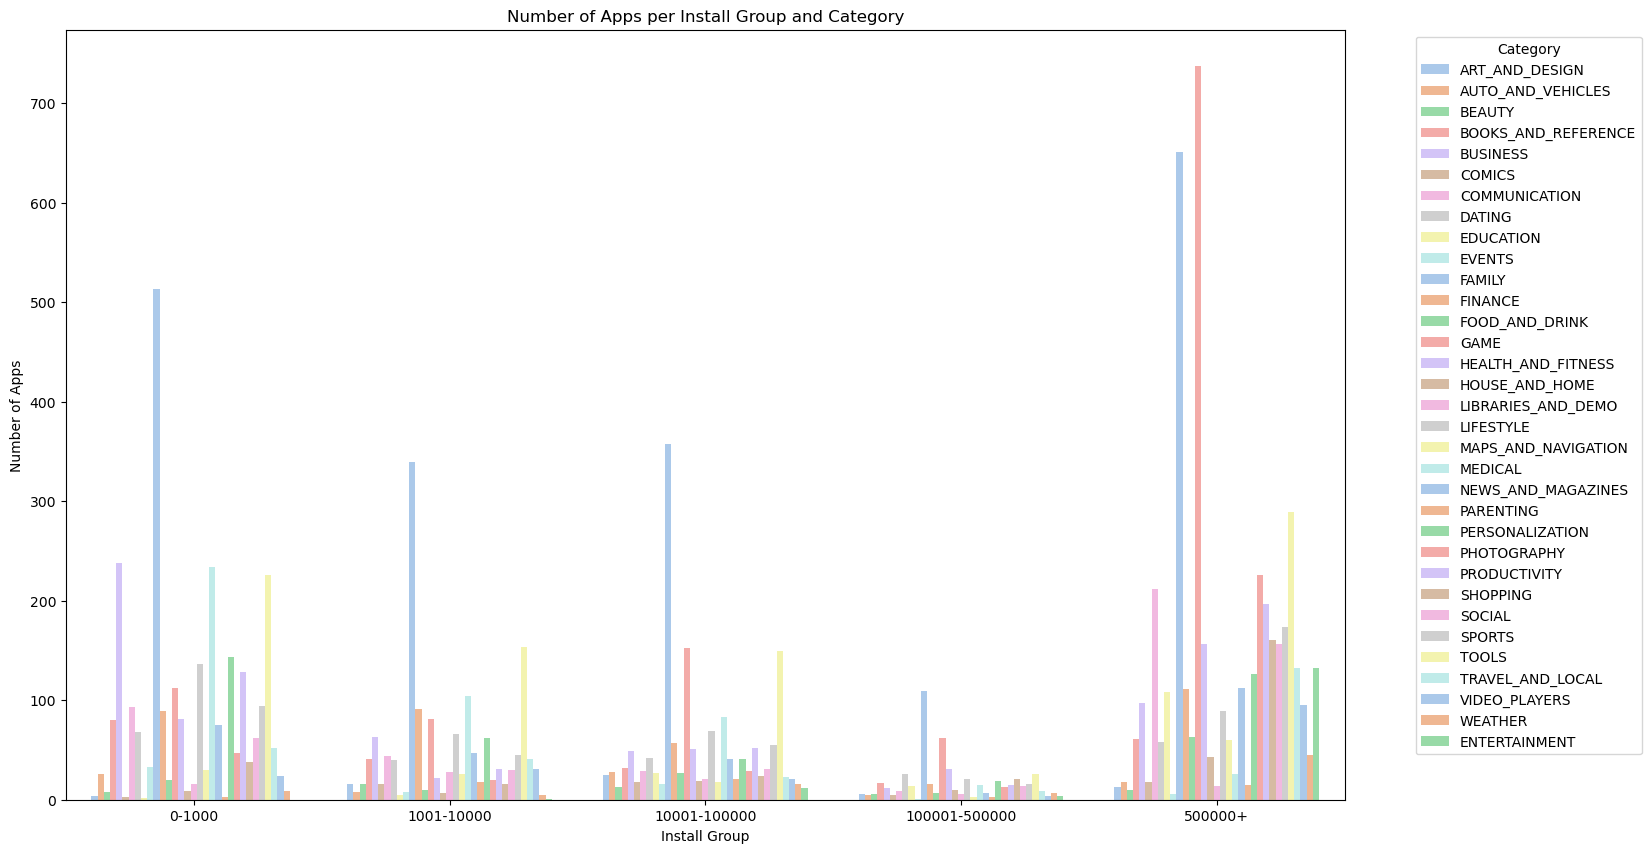

In [7]:
#Create 'Install Group' column based on the bins
appClean['Install Group'] = pd.cut(appClean['Installs'], bins=bins, labels=labels, right=True)

#Count the number of apps in each Category-Install Group combination
category_installs = appClean.groupby(['Install Group', 'Category'], observed=True).size().reset_index(name='Count')

#Set up the plot
plt.figure(figsize=(16.5, 10))
sns.barplot(
    x='Install Group', y='Count', hue='Category', data=category_installs, palette='pastel'
)

# Set titles and labels
plt.title('Number of Apps per Install Group and Category')
plt.xlabel('Install Group')
plt.ylabel('Number of Apps')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()